In [1]:
! python3 -m pip install -U tensorflow==2.0.0a0 > /dev/null
from utils import *

You are using pip version 19.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# MNIST without batch normalization
from tensorflow import keras

# Download and set train/test/validation datasets
(X_train_full, y_train_full), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Full train dataset shape", X_train_full.shape)
print("Train dataset dtype", X_train_full.dtype)

# Notice this datasets are not normalized
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

epochs = 20
batch_size = 32

11493376/11490434 [==============================] - 3s 0us/step
Full train dataset shape (60000, 28, 28)
Train dataset dtype uint8


In [3]:
# Let's define the network. First without BatchNormalization
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

history_wo_batch_normalization = model.fit(X_train, y_train, batch_size=batch_size,
                        epochs=epochs, 
                        validation_data=(X_valid, y_valid),
                        callbacks=[keras.callbacks.TensorBoard(get_run_logidr())])

# Finally save the model
model.save("mnist_no_batchnorm.h5")

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 17s 302us/sample - loss: 1.7063 - accuracy: 0.5846 - val_loss: 1.1363 - val_accuracy: 0.7802
Epoch 2/20
55000/55000 [==============================] - 23s 414us/sample - loss: 0.8655 - accuracy: 0.8146 - val_loss: 0.6654 - val_accuracy: 0.8470
Epoch 3/20
55000/55000 [==============================] - 23s 427us/sample - loss: 0.5928 - accuracy: 0.8569 - val_loss: 0.5101 - val_accuracy: 0.8720
Epoch 4/20
55000/55000 [==============================] - 16s 293us/sample - loss: 0.4863 - accuracy: 0.8755 - val_loss: 0.4343 - val_accuracy: 0.8878
Epoch 5/20
55000/55000 [==============================] - 18s 332us/sample - loss: 0.4299 - accuracy: 0.8858 - val_loss: 0.3893 - val_accuracy: 0.8946
Epoch 6/20
55000/55000 [==============================] - 17s 316us/sample - loss: 0.3944 - accuracy: 0.8935 - val_loss: 0.3601 - val_accuracy: 0.9000
Epoch 7/20
55000/55000 [=====================

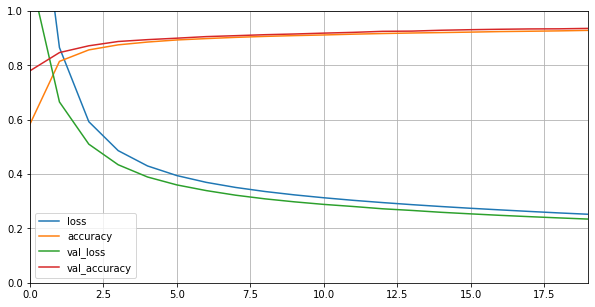

In [4]:
draw_history(history_wo_batch_normalization)

In [5]:
# Now let's define a network that uses batch normalization

# Let's define the network. First without BatchNormalization
model2 = keras.models.Sequential()

model2.add(keras.layers.Flatten(input_shape=[28,28]))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(300, activation="relu"))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(100, activation="relu"))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(10, activation="softmax"))

model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

history_w_batch_normalization = model2.fit(X_train, y_train, batch_size=batch_size,
                        epochs=epochs, 
                        validation_data=(X_valid, y_valid),
                        callbacks=[keras.callbacks.TensorBoard(get_run_logidr())])

# Finally save the model
model2.save("mnist_w_batchnorm.h5")

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 18s 320us/sample - loss: 0.8373 - accuracy: 0.7454 - val_loss: 0.4655 - val_accuracy: 0.8716
Epoch 2/20
55000/55000 [==============================] - 15s 273us/sample - loss: 0.4383 - accuracy: 0.8720 - val_loss: 0.3447 - val_accuracy: 0.9038
Epoch 3/20
55000/55000 [==============================] - 15s 274us/sample - loss: 0.3550 - accuracy: 0.8969 - val_loss: 0.2922 - val_accuracy: 0.9190
Epoch 4/20
55000/55000 [==============================] - 24s 443us/sample - loss: 0.3138 - accuracy: 0.9079 - val_loss: 0.2610 - val_accuracy: 0.9272
Epoch 5/20
55000/55000 [==============================] - 18s 326us/sample - loss: 0.2825 - accuracy: 0.9174 - val_loss: 0.2385 - val_accuracy: 0.9332
Epoch 6/20
55000/55000 [==============================] - 25s 454us/sample - loss: 0.2584 - accuracy: 0.9246 - val_loss: 0.2230 - val_accuracy: 0.9364
Epoch 7/20
55000/55000 [=====================

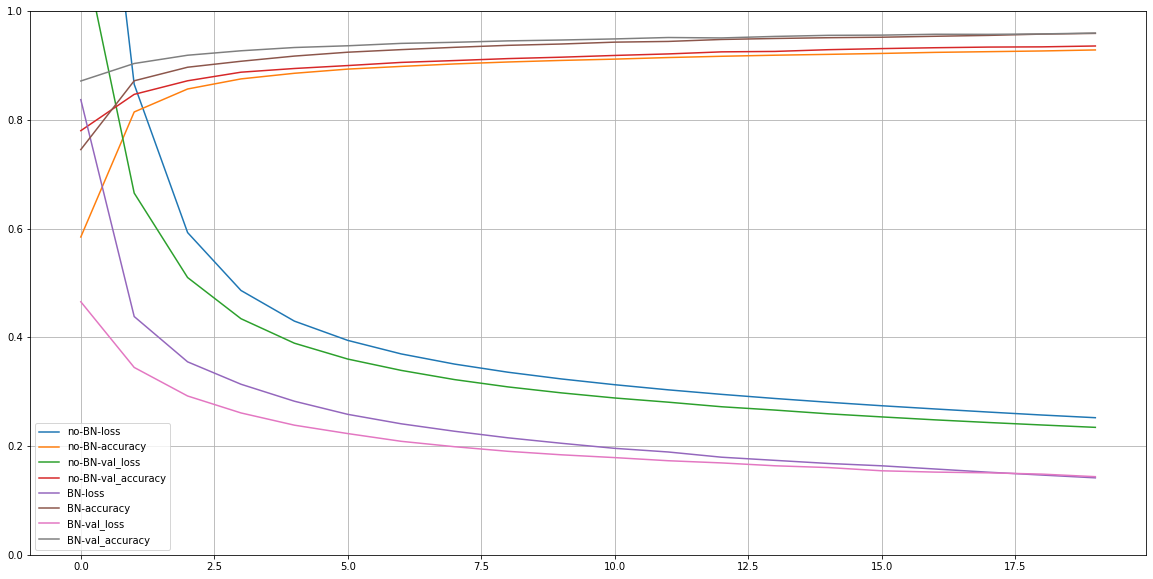

In [6]:
draw_histories([history_wo_batch_normalization, history_w_batch_normalization], 
               ["no-BN", "BN"])

In [7]:
# Let's use ELU and he_normal initializer
# Now let's define a network that uses batch normalization

# Let's define the network. First without BatchNormalization
model3 = keras.models.Sequential()

model3.add(keras.layers.Flatten(input_shape=[28,28]))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Dense(10, activation="softmax"))

model3.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

history_w_batch_normalization_elu = model3.fit(X_train, y_train, batch_size=batch_size,
                            epochs=epochs, 
                            validation_data=(X_valid, y_valid),
                            callbacks=[keras.callbacks.TensorBoard(get_run_logidr())])

# Finally save the model
model3.save("mnist_w_batchnorm_elu.h5")

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 14s 255us/sample - loss: 0.9001 - accuracy: 0.7225 - val_loss: 0.4924 - val_accuracy: 0.8592
Epoch 2/20
55000/55000 [==============================] - 17s 312us/sample - loss: 0.4721 - accuracy: 0.8618 - val_loss: 0.3818 - val_accuracy: 0.8912
Epoch 3/20
55000/55000 [==============================] - 12s 220us/sample - loss: 0.4020 - accuracy: 0.8823 - val_loss: 0.3357 - val_accuracy: 0.9028
Epoch 4/20
55000/55000 [==============================] - 13s 230us/sample - loss: 0.3629 - accuracy: 0.8937 - val_loss: 0.3069 - val_accuracy: 0.9126
Epoch 5/20
55000/55000 [==============================] - 11s 208us/sample - loss: 0.3400 - accuracy: 0.9017 - val_loss: 0.2883 - val_accuracy: 0.9158
Epoch 6/20
55000/55000 [==============================] - 13s 239us/sample - loss: 0.3180 - accuracy: 0.9076 - val_loss: 0.2717 - val_accuracy: 0.9216
Epoch 7/20
55000/55000 [=====================

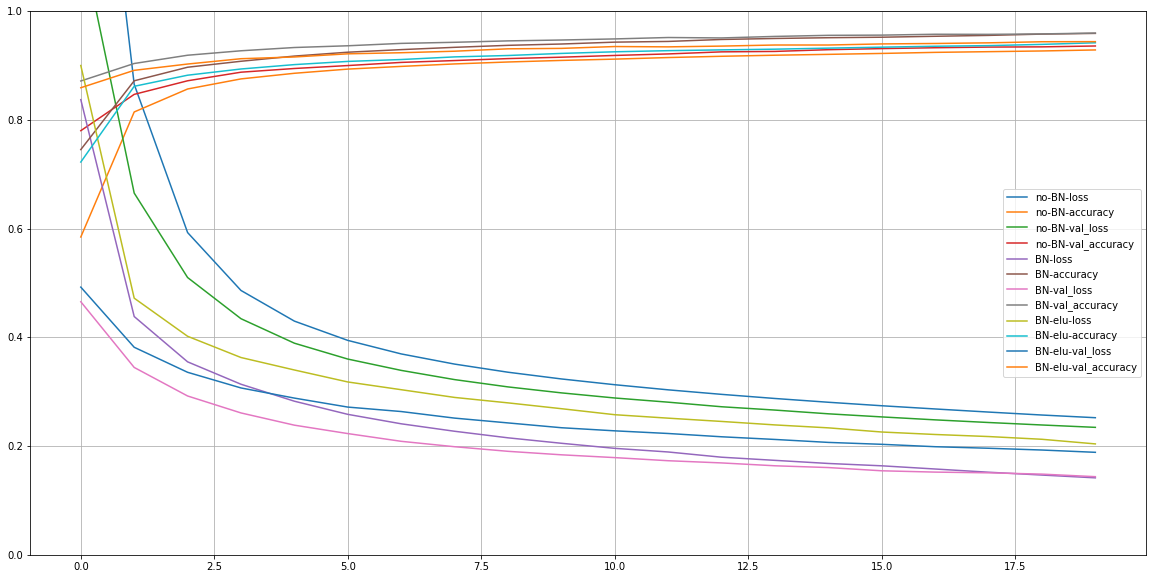

In [8]:
draw_histories([history_wo_batch_normalization,
                history_w_batch_normalization, 
                history_w_batch_normalization_elu], 
               ["no-BN","BN","BN-elu"])